# QUESTION 1 (EDA)

In [36]:
import pandas as pd

permits_df = pd.read_csv('/Users/admin/Projects/WAF/DataChallenge/Building_Permits.csv', low_memory = False)
permits_df.shape
permits_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 43 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Number Suffix                    2216 non-null    object 
 8   Street Name                             198900 non-null  object 
 9   Street Suffix                           196132 non-null  object 
 10  Unit                                    2947

In [37]:
# Check missing values in each column and display columns where >20% of values are missing
missing_values = permits_df.isnull().sum() / len(permits_df) * 100
missing_values[missing_values > 20].sort_values(ascending = False)

TIDF Compliance                           99.998994
Voluntary Soft-Story Retrofit             99.982403
Unit Suffix                               99.014077
Street Number Suffix                      98.885872
Site Permit                               97.305681
Structural Notification                   96.519859
Fire Only Permit                          90.534439
Unit                                      85.178984
Completed Date                            51.135747
Permit Expiration Date                    26.083459
Existing Units                            25.911513
Proposed Units                            25.596280
Existing Construction Type                21.802916
Existing Construction Type Description    21.802916
Proposed Construction Type                21.700352
Proposed Construction Type Description    21.700352
Number of Proposed Stories                21.552539
Number of Existing Stories                21.510307
Proposed Use                              21.336853
Existing Use

In [38]:
# Drop columns where more than 80% of values are missing
drop_cols = missing_values[missing_values > 80].index
permits_cleaned_df = permits_df.drop(columns = drop_cols)
permits_cleaned_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 198900 entries, 0 to 198899
Data columns (total 35 columns):
 #   Column                                  Non-Null Count   Dtype  
---  ------                                  --------------   -----  
 0   Permit Number                           198900 non-null  object 
 1   Permit Type                             198900 non-null  int64  
 2   Permit Type Definition                  198900 non-null  object 
 3   Permit Creation Date                    198900 non-null  object 
 4   Block                                   198900 non-null  object 
 5   Lot                                     198900 non-null  object 
 6   Street Number                           198900 non-null  int64  
 7   Street Name                             198900 non-null  object 
 8   Street Suffix                           196132 non-null  object 
 9   Description                             198610 non-null  object 
 10  Current Status                          1989

In [39]:
# Converting relevant date columns to datetime format and checking for duplicates
date_cols = ['Permit Creation Date', 'Filed Date', 'Issued Date', 
    'Completed Date', 'First Construction Document Date', 'Permit Expiration Date']

for col in date_cols:
    permits_df[col] = pd.to_datetime(permits_df[col], errors = 'coerce')

duplicates_count = permits_df.duplicated().sum()
numeric_descriptive_stats = permits_df.describe()
{"duplicates_count": duplicates_count, "numeric_descriptive_stats": numeric_descriptive_stats}

/var/folders/dd/0vbwv_857dvfzm221ynnp1900000gn/T/ipykernel_18124/927741701.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  permits_df[col] = pd.to_datetime(permits_df[col], errors = 'coerce')
/var/folders/dd/0vbwv_857dvfzm221ynnp1900000gn/T/ipykernel_18124/927741701.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  permits_df[col] = pd.to_datetime(permits_df[col], errors = 'coerce')
/var/folders/dd/0vbwv_857dvfzm221ynnp1900000gn/T/ipykernel_18124/927741701.py:6: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  permits_df[col] = pd.to_datetime(permits_df[col], errors = 'c

{'duplicates_count': 111,
 'numeric_descriptive_stats':          Permit Type           Permit Creation Date  Street Number  \
 count  198900.000000                         198900  198900.000000   
 mean        7.522323  2015-08-29 05:19:34.805429760    1121.728944   
 min         1.000000            2012-03-28 00:00:00       0.000000   
 25%         8.000000            2014-05-30 00:00:00     235.000000   
 50%         8.000000            2015-09-09 00:00:00     710.000000   
 75%         8.000000            2016-12-06 00:00:00    1700.000000   
 max         8.000000            2018-02-23 00:00:00    8400.000000   
 std         1.457451                            NaN    1135.768948   
 
                Unit                     Filed Date  \
 count  29479.000000                         198900   
 mean      78.517182  2015-08-29 09:30:48.977375488   
 min        0.000000            2013-01-02 00:00:00   
 25%        0.000000            2014-05-30 00:00:00   
 50%        0.000000         

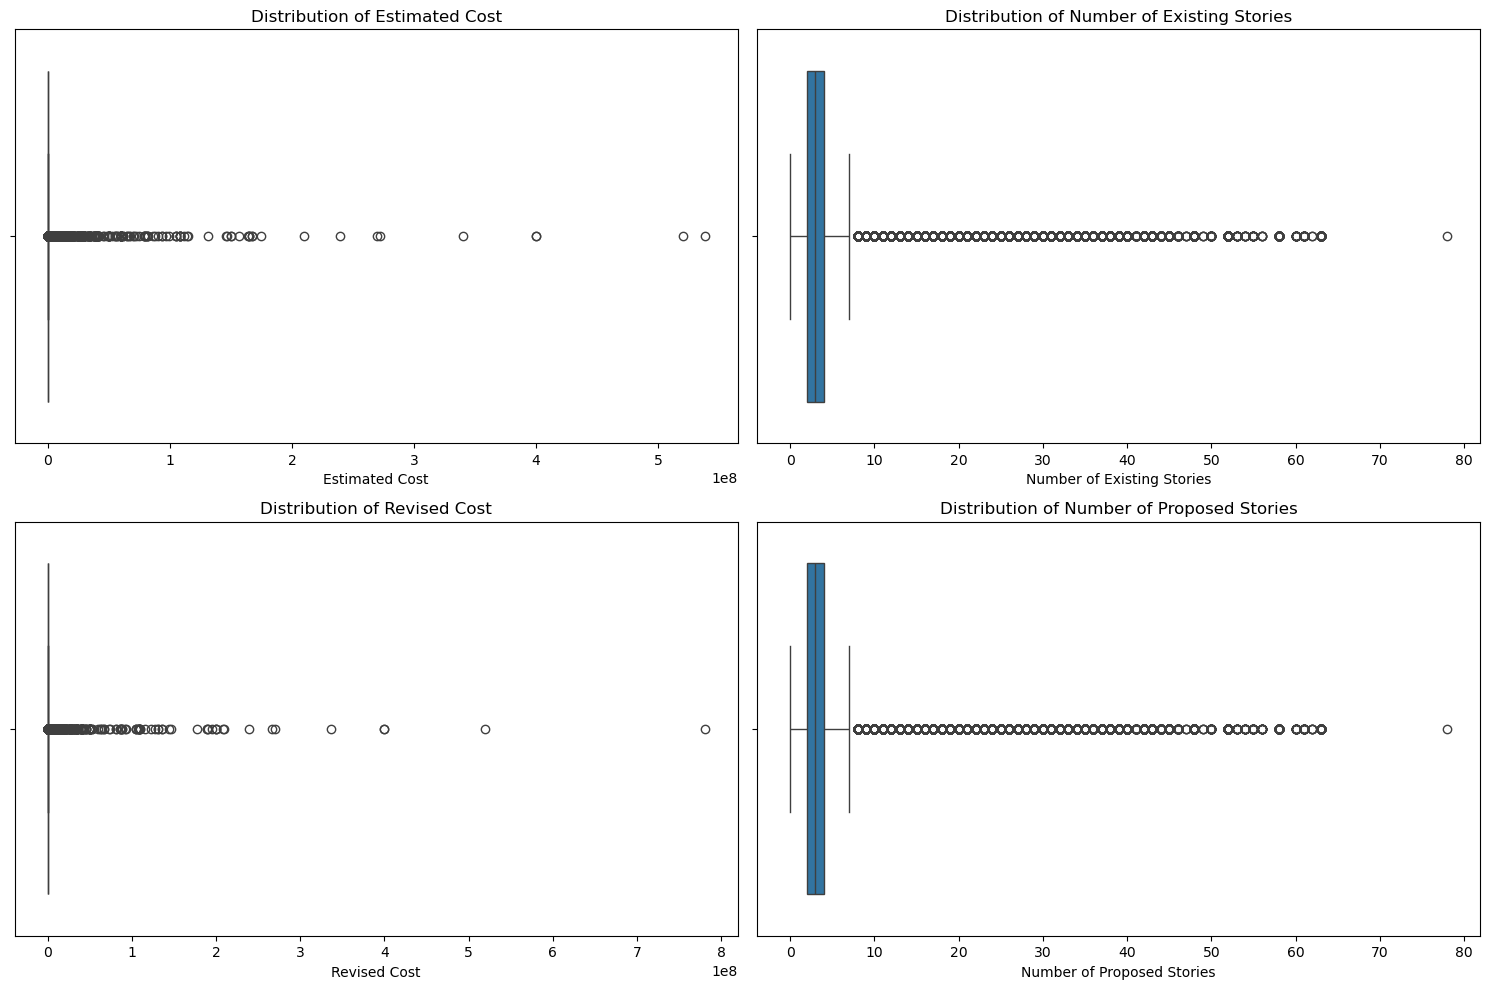

In [41]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

permits_cleaned_df = permits_df.drop_duplicates()

# Plotting distribution of some numeric variables to check for outliers
plt.figure(figsize = (15, 10))

# Estimated Cost
plt.subplot(2, 2, 1)
sns.boxplot(data = permits_cleaned_df, x = 'Estimated Cost')
plt.title('Distribution of Estimated Cost')

# Number of Existing Stories
plt.subplot(2, 2, 2)
sns.boxplot(data = permits_cleaned_df, x = 'Number of Existing Stories')
plt.title('Distribution of Number of Existing Stories')

# Revised Cost
plt.subplot(2, 2, 3)
sns.boxplot(data = permits_cleaned_df, x = 'Revised Cost')
plt.title('Distribution of Revised Cost')

# Number of Proposed Stories
plt.subplot(2, 2, 4)
sns.boxplot(data = permits_cleaned_df, x = 'Number of Proposed Stories')
plt.title('Distribution of Number of Proposed Stories')

plt.tight_layout()
plt.show()

# QUESTION 2 (CLASSIFICATION)

In [46]:
# Import necessary libraries for model building
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Feature Selection - choosing relevant columns for prediction
features = ['Permit Type', 'Estimated Cost', 'Revised Cost', 'Number of Existing Stories', 'Number of Proposed Stories', 
    'Existing Construction Type', 'Proposed Construction Type', 'Supervisor District', 'Neighborhoods - Analysis Boundaries']

# Select target column (Approved vs Withdrawn) and split dataset into features and target
permits_cleaned_df = permits_cleaned_df[permits_cleaned_df['Current Status'].isin(['approved', 'withdrawn'])]
X = permits_cleaned_df[features]
y = permits_cleaned_df['Current Status'].map({'approved': 1, 'withdrawn': 0})

# One-hot encoding categorical features
X_encoded = pd.get_dummies(X, drop_first = True)

# Train-test split and feature scaling
X_train, X_test, y_train, y_test = train_test_split(X_encoded, y, test_size = 0.3, random_state = 42)

scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Random Forest classifier model
clf = RandomForestClassifier(random_state = 42)
clf.fit(X_train_scaled, y_train)
y_pred = clf.predict(X_test_scaled)

report = classification_report(y_test, y_pred, target_names = ['Withdrawn', 'Approved'])
print(report)

              precision    recall  f1-score   support

   Withdrawn       0.98      0.95      0.97       537
    Approved       0.89      0.96      0.92       210

    accuracy                           0.95       747
   macro avg       0.94      0.96      0.94       747
weighted avg       0.96      0.95      0.95       747



In [49]:
from sklearn.impute import SimpleImputer

# Impute missing values for remaining NaNs
imputer = SimpleImputer(strategy = 'most_frequent')
X_encoded_imputed = imputer.fit_transform(X_encoded)

# Train-test split (re-splitting with imputed data) and re-train Random Forest model
X_train_imputed, X_test_imputed, y_train_imputed, y_test_imputed = train_test_split(X_encoded_imputed, y, test_size = 0.3, random_state = 42)

clf.fit(X_train_imputed, y_train_imputed)

# Feature importances
importances = clf.feature_importances_
feature_importances_df = pd.DataFrame({'Feature': X_encoded.columns, 'Importance': importances})
feature_importances_df = feature_importances_df.sort_values(by = 'Importance', ascending = False)
feature_importances_df.head(8)

,Feature,Importance
2,Revised Cost,0.554601
0,Permit Type,0.193672
1,Estimated Cost,0.081697
4,Number of Proposed Stories,0.029104
3,Number of Existing Stories,0.026842
7,Supervisor District,0.023989
6,Proposed Construction Type,0.009681
5,Existing Construction Type,0.009063


# Question 3 (REGRESSION)

In [71]:
from sklearn.impute import SimpleImputer

# Impute missing values for both numeric and categorical features
imputer = SimpleImputer(strategy='most_frequent')
X_encoded_reg_imputed = imputer.fit_transform(X_encoded_regression)

# Train-test split (re-splitting with imputed data) and re-train Linear Regression model
X_train_reg_imputed, X_test_reg_imputed, y_train_reg_imputed, y_test_reg_imputed = train_test_split(X_encoded_reg_imputed, y_regression, test_size = 0.3, random_state = 42)

lr_model.fit(X_train_reg_imputed, y_train_reg_imputed)

# Predictions and model evaluation
y_pred_reg_imputed = lr_model.predict(X_test_reg_imputed)

mse_imputed = mean_squared_error(y_test_reg_imputed, y_pred_reg_imputed)
r2_imputed = r2_score(y_test_reg_imputed, y_pred_reg_imputed)
mae_imputed = mean_absolute_error(y_test_reg_imputed, y_pred_reg_imputed)

mse_imputed, r2_imputed, mae_imputed

(1003604183192.3921, 0.9303469908970614, 250394.65373094572)

# Visualizations

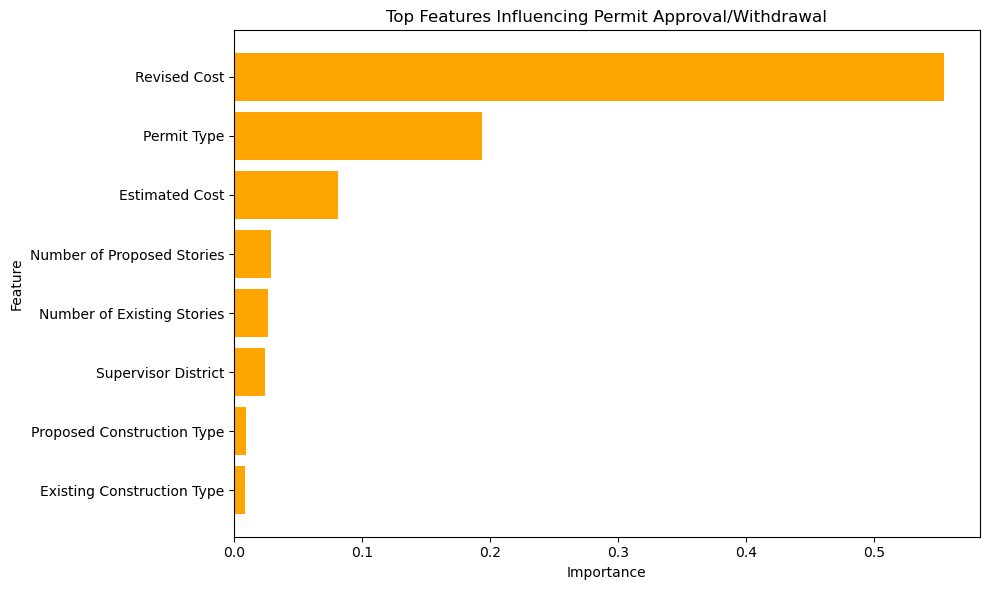

In [74]:
# Plotting feature importance (Slide 2)
plt.figure(figsize=(10, 6))
plt.barh(feature_importances_df['Feature'][:8], feature_importances_df['Importance'][:8], color = 'orange')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.title('Top Features Influencing Permit Approval/Withdrawal')
plt.gca().invert_yaxis()  # Invert y-axis to have the most important feature at the top
plt.tight_layout()
plt.show()

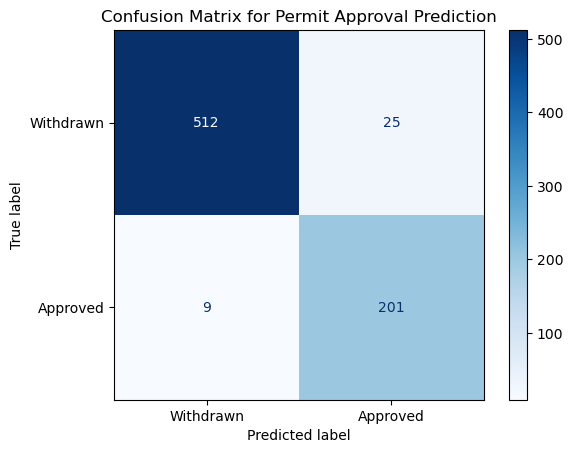

              precision    recall  f1-score   support

   Withdrawn       0.98      0.95      0.97       537
    Approved       0.89      0.96      0.92       210

    accuracy                           0.95       747
   macro avg       0.94      0.96      0.94       747
weighted avg       0.96      0.95      0.95       747



In [76]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

# Create confusion matrix (Slide 3)
cm = confusion_matrix(y_test, y_pred)
disp = ConfusionMatrixDisplay(confusion_matrix = cm, display_labels = ['Withdrawn', 'Approved'])
disp.plot(cmap = plt.cm.Blues)
plt.title('Confusion Matrix for Permit Approval Prediction')
plt.show()

report = classification_report(y_test, y_pred, target_names=['Withdrawn', 'Approved'])
print(report)

/var/folders/dd/0vbwv_857dvfzm221ynnp1900000gn/T/ipykernel_18124/909003997.py:4: UserWarning: color is redundantly defined by the 'color' keyword argument and the fmt string "k--" (-> color='k'). The keyword argument will take precedence.
  plt.plot([y_test_reg_imputed.min(), y_test_reg_imputed.max()], [y_test_reg_imputed.min(), y_test_reg_imputed.max()], 'k--', lw = 3, color = 'red')


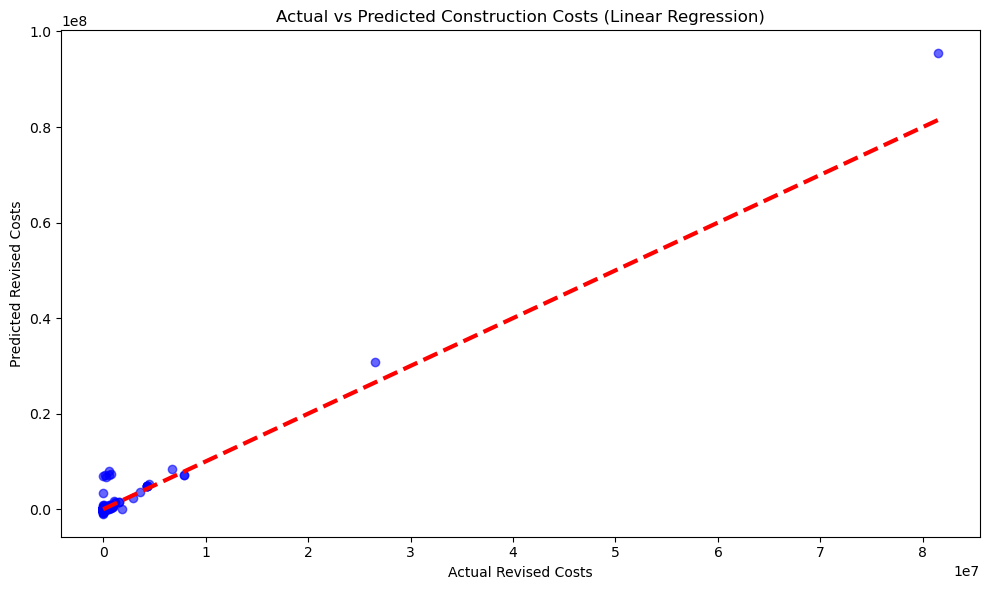

In [78]:
# Scatterplot for actual vs. predicted costs for factors affecting construction costs (Slide 4)
plt.figure(figsize = (10, 6))
plt.scatter(y_test_reg_imputed, y_pred_reg_imputed, alpha=0.6, color = 'blue')
plt.plot([y_test_reg_imputed.min(), y_test_reg_imputed.max()], [y_test_reg_imputed.min(), y_test_reg_imputed.max()], 'k--', lw = 3, color = 'red')
plt.xlabel('Actual Revised Costs')
plt.ylabel('Predicted Revised Costs')
plt.title('Actual vs Predicted Construction Costs (Linear Regression)')
plt.tight_layout()
plt.show()

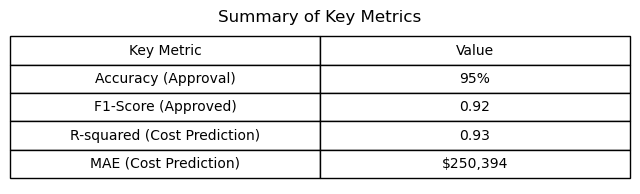

In [80]:
# Summary table (Slide 5)
data = {"Key Metric": ["Accuracy (Approval)", "F1-Score (Approved)", "R-squared (Cost Prediction)", "MAE (Cost Prediction)"], "Value": ["95%", "0.92", "0.93", "$250,394"]}
df_summary = pd.DataFrame(data)

# Plot table
fig, ax = plt.subplots(figsize = (8, 2))
ax.axis('tight'), ax.axis('off')
table = ax.table(cellText = df_summary.values, colLabels = df_summary.columns, cellLoc = 'center', loc = 'center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1, 1.7)
plt.title('Summary of Key Metrics')
plt.show()